In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
taxis2023 = pd.read_parquet('Data/Normalized/taxis_2023.parquet')

**Preguntas a responder**

¿Que cantidad de pasajeros frecuenta mas en los viajes?

¿Cual es el servicio mas utilizado?

¿Hay un servicio con mayor costo?

¿Hay alguna relacion entre la distancia y el precio?

¿Hay alguna relacion entre el tipo de servicio y el precio?

¿Si hay mas pasajeros el precio es mas caro?

¿Cual es la zona con mayor cantidad de viajes?


A continuacion observamos el contenido del dataframe y los tipos de datos.

In [3]:
taxis2023.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,Servicio,Pickup_borough
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,2.58,24.18,Green,Manhattan
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,1.81,15.84,Green,Manhattan
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,0.00,11.64,Green,Queens
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,1.30,10.20,Green,Manhattan
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,1.10,8.00,Green,Manhattan


In [4]:
def data_characterics(dataframe):
    list =[]
    for columna in dataframe.columns:
      type_data = dataframe[columna].dtypes
      data_null = dataframe[columna].isnull().sum()
      porcentaje = round((data_null / len(dataframe)) * 100)
    
      list.append({'Columna':columna,
                   'Tipo':type_data,
                   'Nulos':data_null,
                    'Porcentaje':f'{porcentaje} %'} )
      
    return pd.DataFrame(list)
  
#Funcion para agregar etiqueta de magnitud a graficos de barras
def ubication_label(grafico):
  for p in grafico.patches:    
    height = p.get_height() # Obtiene la altura (frecuencia) de la barra
    pos_inicial_bar = p.get_x()
    ancho_barra = p.get_width() / 1.8
    
    x_pos = pos_inicial_bar + ancho_barra #Posicion donde se coloca la etiqueta
    y_pos = height # Ajuste de la posición vertical
    
    height = int(height)
        # Agrega la etiqueta 
    grafico.annotate(f'{height}', (x_pos, y_pos), ha='center', va='bottom')

data_characterics(taxis2023)

,Columna,Tipo,Nulos,Porcentaje
0,tpep_pickup_datetime,datetime64[us],0,0 %
1,tpep_dropoff_datetime,datetime64[us],0,0 %
2,passenger_count,float64,38905,2 %
3,trip_distance,float64,0,0 %
4,total_amount,float64,0,0 %
5,Servicio,object,0,0 %
6,Pickup_borough,object,0,0 %


In [5]:
#Elimina las filas donde passenger_count tiene data nula y 0
taxis2023.dropna(subset=['passenger_count'],inplace=True)
taxis2023.drop(taxis2023[taxis2023['passenger_count'] == 0].index, inplace=True)

#Se cambia el tipo de dato a entero
taxis2023['passenger_count'] = taxis2023['passenger_count'].astype(int)
taxis2023.shape


(1790351, 7)

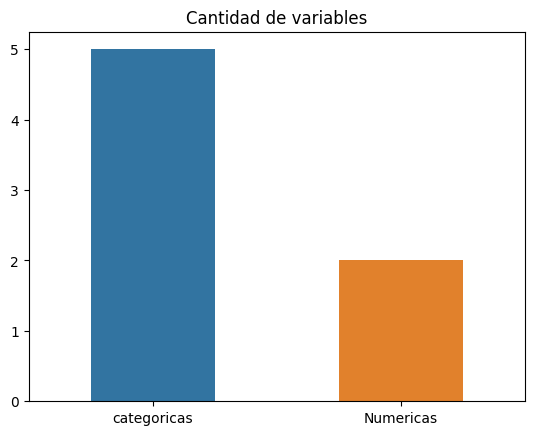

In [6]:

categoricos = len(taxis2023.select_dtypes(exclude='float64').columns)
numericos = len(taxis2023.select_dtypes(include='float64').columns)

sns.barplot(x=['categoricas','Numericas'], y=[categoricos,numericos], 
            hue=['categoricas','Numericas'],width=0.5 )
plt.title('Cantidad de variables')
plt.show()

El dataset cuenta con 7 columnas. Las columnas **tpep_pickup_datetime**, **tpep_dropoff_datetime** contienen datos sobre las fechas de inicio y fin del recorrido. Las columnas Numericas **passenger_count**, **trip_distance** y **total_amount**, contienen la cantidad de pasajeros, la distancia recorrida por viaje y el precio total del viaje.                                           Las columnas **Servicio** y **Pickup_borough** contienen datos sobre el tipo de taxi y el distrito donde comenzo el viaje.

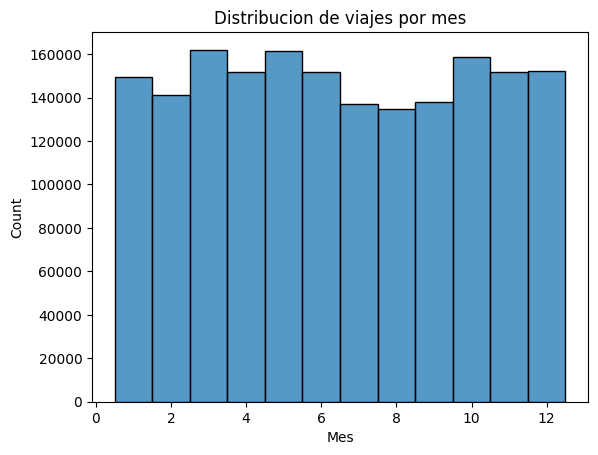

In [7]:
mes = taxis2023['tpep_dropoff_datetime'].dt.month
sns.histplot(x=mes, discrete=True)
plt.title('Distribucion de viajes por mes')
plt.xlabel('Mes')
plt.show()

Se puede observar que los meses 3 y 5 contienen la mayor cantidad de viajes. Entre los meses 7 a 9 se observa una disminucion.

#### **Analisis de passenger_count**

In [8]:
taxis2023['passenger_count'].describe()

count    1.790351e+06
mean     1.358126e+00
std      9.037486e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

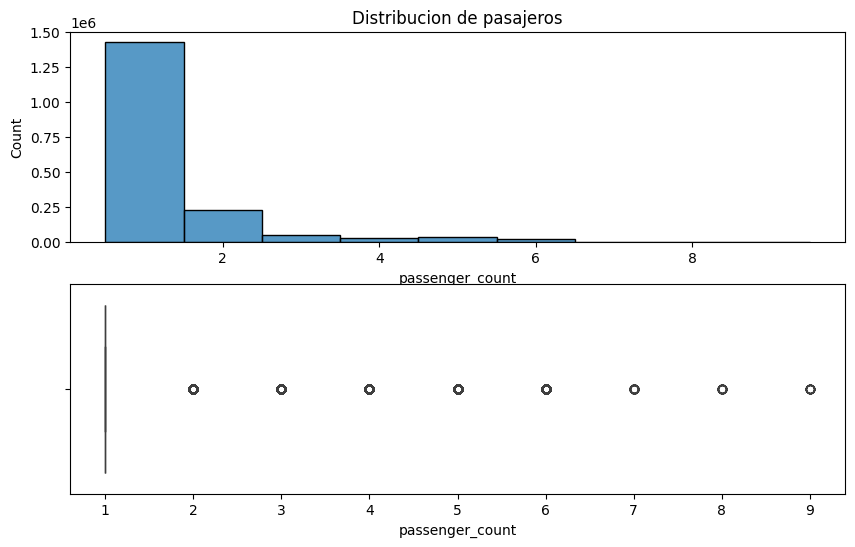

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.histplot(data=taxis2023, x='passenger_count',discrete=True)
plt.title('Distribucion de pasajeros')

plt.subplot(2,1,2)
sns.boxplot(data=taxis2023, x='passenger_count')
plt.show()

En el resumen estadistico vemos que el promedio de pasajeros es de 1.35, lo que indica que mayormente los viajes tienen 1 pasajero. El 75% de lo viajes tienen 1 pasajero.

En el histograma se nota un sesgo a la derecha, lo que significa que la mayoria de los valores se concentran en la parte baja (en 1 pasajero).

En el diagrama de cajas, la mediana se encuentra en 1 y la caja tambien, lo que indica que hay una muy baja variabilidad en los datos. Se puede observar que los valores mayores a 1 se visualizan como outliers esto es debido a la gran concentracion de valores en 1.

#### **Analisis de trip_distance**

In [42]:
#sampled_data = taxis2023.sample(frac=0.1, random_state=42)
# Comparar estadísticas descriptivas entre la muestra y el conjunto completo
print("Estadísticas descriptivas de trip_distance :")
print(taxis2023['trip_distance'].describe())

Estadísticas descriptivas de trip_distance :
count   1756997.00
mean          3.01
std           3.57
min           0.00
25%           1.09
50%           1.80
75%           3.24
max          59.90
Name: trip_distance, dtype: float64


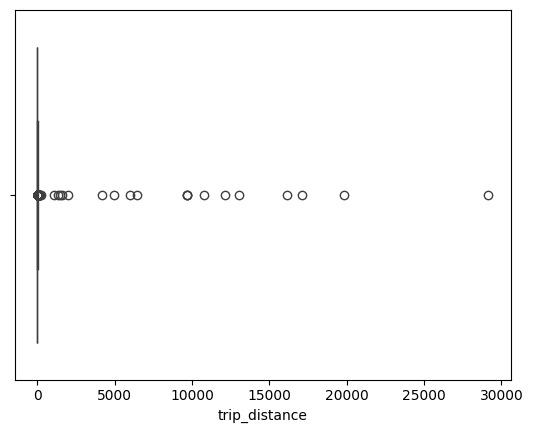

In [12]:
sns.boxplot(data=taxis2023, x='trip_distance')
plt.show()

Al observar el boxplot de "trip_distance" se nota que hay algunos valores atipicos. A continuacion veremos esto con un poco mas de profundidad.

In [13]:
outliers =taxis2023[taxis2023['trip_distance'] > 65]
outliers

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,Servicio,Pickup_borough
7135,2023-01-05 09:00:03,2023-01-05 15:18:38,1,66.18,18.75,Green,Queens
32577,2023-01-17 18:40:38,2023-01-17 19:04:45,1,1571.97,43.31,Green,Queens
81078,2023-02-09 18:53:47,2023-02-09 19:23:33,1,6470.33,39.60,Green,Queens
154756,2023-03-16 16:24:01,2023-03-16 21:57:56,1,73.30,433.25,Green,Manhattan
262923,2023-05-09 18:58:39,2023-05-09 19:23:17,1,16160.10,32.69,Green,Queens
...,...,...,...,...,...,...,...
1752398,2023-12-31 16:58:05,2023-12-31 18:25:40,1,72.20,307.75,Yellow,Queens
1793901,2023-12-21 15:22:52,2023-12-21 17:42:35,1,82.80,574.95,Yellow,Queens
1819489,2023-12-04 21:09:40,2023-12-04 22:06:12,1,74.51,-330.59,Yellow,Queens
1827592,2023-12-19 23:23:35,2023-12-20 00:56:08,1,70.57,426.78,Yellow,Queens


In [14]:
print(len(outliers))

93


Luego de investigar sobre las distancias entre los diferentes distritos, llegamos a la conclusion de que los valores atipicos son aquellos mayores a 65 millas. Encontramos 93, los cuales seran eliminados a continuacion.

In [15]:
taxis2023.drop(taxis2023[taxis2023['trip_distance'] > 60].index, inplace=True)

count   1756997.00
mean          3.01
std           3.57
min           0.00
25%           1.09
50%           1.80
75%           3.24
max          59.90
Name: trip_distance, dtype: float64


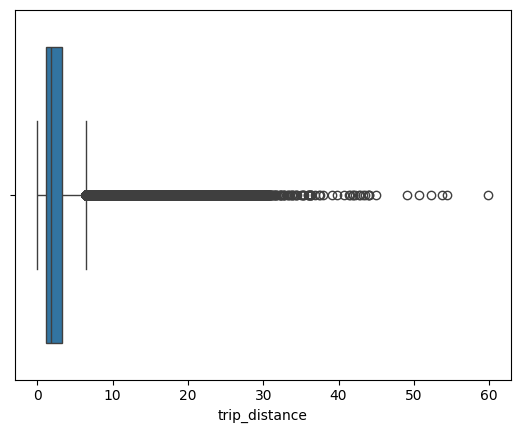

In [43]:
print(taxis2023['trip_distance'].describe())
sns.boxplot(data=taxis2023, x='trip_distance')
plt.show()

Al observar el diagrama con los datos considerados outliers eliminados. Podemos ver que los mayores a 8 tambien los considera outliers, esto es debido a que la mayor cantidad de valores se concentran entre 0 y 7.


La mediana, es de 1.8 millas lo que indica que el 50% de los viajes tienen una distancia igual o menor a 1.8 millas. El 75% de los datos son menores a 3.25 millas


#### **Analisis de total_amount**


In [40]:
print("Estadísticas descriptivas de total_amout:")
print(taxis2023['total_amount'].describe())

Estadísticas descriptivas de total_amout:
count   1756997.00
mean         25.53
std          17.62
min           0.00
25%          14.88
50%          20.00
75%          28.88
max         100.00
Name: total_amount, dtype: float64


Al observar las estadisticas notamos que hay precios menores a cero, estos seran eliminados y se dejara como valor minimo el cero.

In [27]:
taxis2023.drop(taxis2023[taxis2023['total_amount']<0].index,inplace=True)

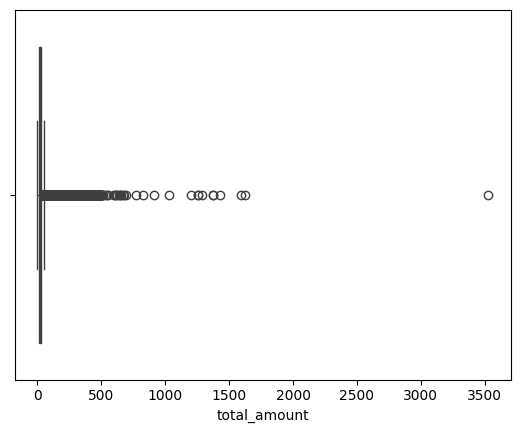

In [32]:
sns.boxplot(data=taxis2023, x='total_amount')
plt.show()

Al visualizar el diagrama de cajas, podemos notar la presencia de varios valores atipicos, a continuacion los veremos con mas detalle.

In [37]:
taxis2023[taxis2023['total_amount']>100]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,Servicio,Pickup_borough
102,2023-01-01 01:11:01,2023-01-01 01:11:06,2,0.01,191.00,Green,Queens
159,2023-01-01 01:59:48,2023-01-01 01:59:51,2,0.09,120.36,Green,Brooklyn
179,2023-01-01 02:09:48,2023-01-01 02:11:34,1,0.00,111.00,Green,Queens
443,2023-01-01 11:41:18,2023-01-01 12:22:07,1,12.37,107.46,Green,Brooklyn
538,2023-01-01 13:07:46,2023-01-01 19:45:18,1,16.00,294.30,Green,Queens
...,...,...,...,...,...,...,...
1845851,2023-12-14 11:32:45,2023-12-14 12:31:01,1,12.98,102.60,Yellow,Queens
1846048,2023-12-07 15:10:32,2023-12-07 17:11:20,4,19.03,144.03,Yellow,Queens
1846291,2023-12-04 13:39:51,2023-12-04 14:34:19,1,21.35,105.46,Yellow,Manhattan
1846299,2023-12-17 15:58:50,2023-12-17 16:26:35,4,10.05,120.00,Yellow,Queens


tomaremos como valores atipicos, aquellos precios mayores a 100 dolares, podemos ver que hay un total de 19925. Estas filas seran eliminadas.

count   1756997.00
mean         25.53
std          17.62
min           0.00
25%          14.88
50%          20.00
75%          28.88
max         100.00
Name: total_amount, dtype: float64


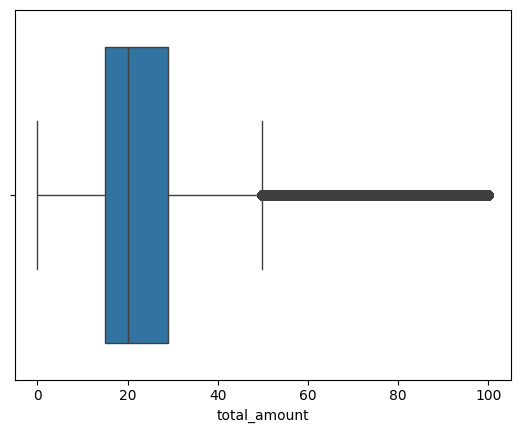

In [41]:
taxis2023.drop(taxis2023[taxis2023['total_amount'] > 100].index, inplace=True)
print(taxis2023['total_amount'].describe())
sns.boxplot(data=taxis2023, x='total_amount')
plt.show()

El promedio del precio de los viajes es de 25.5 dolares. La mediana es 20, lo que indica que el 50% de los viajes cuestan 20 dolares o menos. 


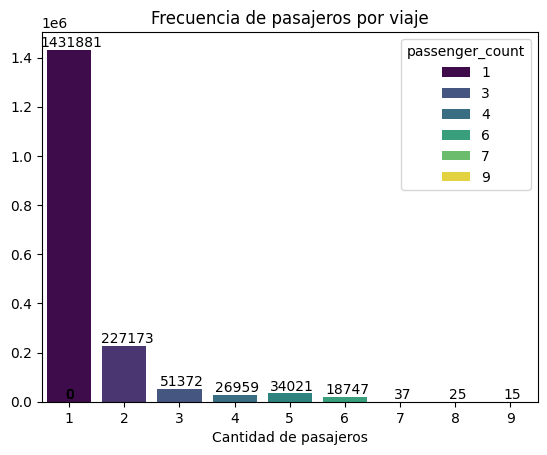

In [19]:
filtrado = taxis2023[taxis2023['passenger_count'] != 0.0]
pasajeros =filtrado['passenger_count'].value_counts()

graphic = sns.barplot(x=pasajeros.index, y=pasajeros.values,
                      hue=pasajeros.index, palette='viridis')
ubication_label(graphic)
plt.title('Frecuencia de pasajeros por viaje')
plt.xlabel('Cantidad de pasajeros')
plt.show()

Se observa que los viajes tienen entre 1 y 9 pasajeros. La gran mayoría tiene solo 1 pasajero, con una frecuencia ampliamente superior al resto, totalizando 1,431,977 viajes. Le siguen los viajes con 2 pasajeros, con un total de 227,189, una frecuencia mucho menor. En el último puesto se encuentran los viajes con 9 pasajeros, con tan solo 15.

In [20]:
#sns.pairplot(data= taxis2023)